## Simple Linear Regression

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## Salary_hike - Build a prediction model for Salary_hike

### Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing Data

In [2]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Data Understanding

### Initial Analysis

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


> By initial analysis, we saw that there is no null values in the data and it is cleaned.

### Assumptions Test

#### 1. Normality

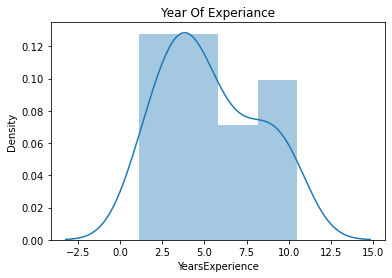

In [7]:
# Plot of Sorting time
sns.distplot(salary_data['YearsExperience'])
plt.title('Year Of Experiance')
plt.show()

> By seeing the plot we can say that the experiance data is approximately normal distributed.

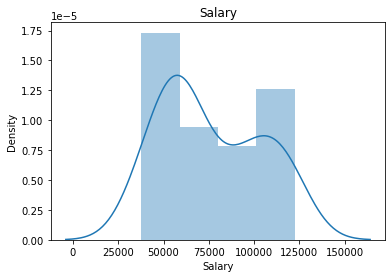

In [8]:
# Plot of Delivery time
sns.distplot(salary_data['Salary'])
plt.title('Salary')
plt.show()

> By seeing the plot we can say that the salary data is approximatly normal distributed.

In [9]:
salary_data['YearsExperience'].skew()

0.37956024064804106

In [10]:
salary_data['Salary'].skew()

0.35411967922959153

> Since the skewnes is in between 0.5 to -0.5, the distribution is approximatly symmetric for both experiance and salary data.

In [11]:
salary_data['YearsExperience'].kurtosis()

-1.0122119403325072

In [12]:
salary_data['Salary'].kurtosis()

-1.295421086394517

> Since the kurtosis value is less than 3, the data is platykurtic for both experiance and salary data.

**Normality test is Passed**

#### 2. Linearity Test

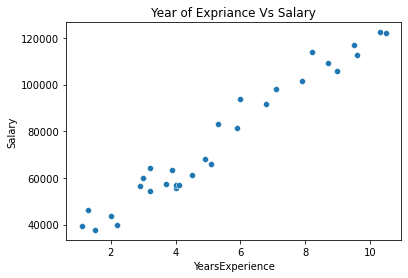

In [13]:
sns.scatterplot(x='YearsExperience', y='Salary', data= salary_data)
plt.title('Year of Expriance Vs Salary')
plt.show()

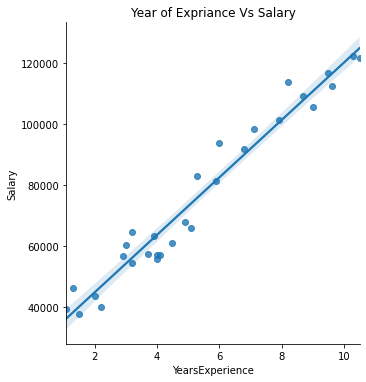

In [14]:
sns.lmplot(x='YearsExperience', y='Salary', data= salary_data)
plt.title('Year of Expriance Vs Salary')
plt.show()

**Linearity test is Pased**

#### 3. Multicollinearity Test
We cannot perform here as we are having onlu one input feature.

#### 4. Auto Regression Test

We cannot perform here as we are having only one input feature and that is also not time based feature.

#### 5. Homoscedasticity Test | 6. Zero Residual Mean Test
These 2 Tests can be ony performed post model Training.

### Data Preparation

In [15]:
X=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)

### Model Building- Simple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_model=LinearRegression()
lin_model.fit(X_train, y_train)
print('Intercept:',lin_model.intercept_)
print('Slope:',lin_model.coef_)

Intercept: 26780.099150628186
Slope: [9312.57512673]


### Model Testing

In [19]:
y_pred=lin_model.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [20]:
test_data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
test_data

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


### Model Evaluation

In [21]:
from sklearn import metrics

In [22]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 12823412.298126562


In [23]:
metrics.r2_score(y_test,y_pred)

0.988169515729126

**From R-square value, we can say that 98.8% of the data fit the regression model.**

#### Now let us transform our explanatory variable by appling square transformation and build the model on it

### Data Preparation

In [24]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
squared_salary_data=pd.DataFrame(salary_data['Salary'].copy())
squared_salary_data['yearexperience_sqr']=salary_data['YearsExperience'].apply(lambda x:np.square(x))
squared_salary_data.head()

,Salary,yearexperience_sqr
0,39343.0,1.21
1,46205.0,1.69
2,37731.0,2.25
3,43525.0,4.00
4,39891.0,4.84


In [26]:
X_sqr=squared_salary_data.iloc[:,1:].values
y=squared_salary_data.iloc[:,0].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_sqr,y, test_size=0.2,random_state=0)

### Model Building- Simple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
trans_lin_model=LinearRegression()
trans_lin_model.fit(X_train, y_train)
print('Intercept:',trans_lin_model.intercept_)
print('Slope:',trans_lin_model.coef_)

Intercept: 48576.89124677988
Slope: [784.5822915]


### Model Testing

In [30]:
y_pred=trans_lin_model.predict(X_test)
y_pred

array([ 50342.20140265, 131813.22655174,  61765.71956685,  60510.38790046,
       119385.44305442, 107961.92489022])

In [31]:
test_data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
test_data

,Actual,Predicted
0,37731.0,50342.201403
1,122391.0,131813.226552
2,57081.0,61765.719567
3,63218.0,60510.387900
4,116969.0,119385.443054
5,109431.0,107961.924890


### Model Evaluation

In [32]:
from sklearn import metrics

In [33]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 47515982.23758923


In [34]:
metrics.r2_score(y_test,y_pred)

0.956163221815846

**From R-square value, we can say that 95.6% of the data fit the regression model when we square transform the explanatory variable.**

#### Now let us transform our explanatory variable by appling log transformation and build the model on it

### Data Preparation

In [35]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
log_salary_data=pd.DataFrame(salary_data['Salary'].copy())
log_salary_data['yearexperience_sqr']=salary_data['YearsExperience'].apply(lambda x:np.log(x))
log_salary_data.head()

,Salary,yearexperience_sqr
0,39343.0,0.095310
1,46205.0,0.262364
2,37731.0,0.405465
3,43525.0,0.693147
4,39891.0,0.788457


In [37]:
log_X=log_salary_data.iloc[:,1:].values
y=log_salary_data.iloc[:,0].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(log_X,y, test_size=0.2,random_state=0)

### Model Building- Simple Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
log_trans_lin_model=LinearRegression()
log_trans_lin_model.fit(X_train, y_train)
print('Intercept:',log_trans_lin_model.intercept_)
print('Slope:',log_trans_lin_model.coef_)

Intercept: 17656.7010400551
Slope: [38310.90138739]


### Model Testing

In [41]:
y_pred=log_trans_lin_model.predict(X_test)
y_pred

array([ 33190.43481281, 107003.23583162,  71712.88384875,  69796.93955778,
       103905.7191307 , 100535.5561452 ])

In [42]:
test_data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
test_data

,Actual,Predicted
0,37731.0,33190.434813
1,122391.0,107003.235832
2,57081.0,71712.883849
3,63218.0,69796.939558
4,116969.0,103905.719131
5,109431.0,100535.556145


### Model Evaluation

In [43]:
from sklearn import metrics

In [44]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 127425452.90556248


In [45]:
metrics.r2_score(y_test,y_pred)

0.8824412113358869

**From R-square value, we can say that 88.2% of the data fit the regression model when we log transform the explanatory variable.**

**By comparing R-square of all the three models, we can say that normal model fits better**